# Importación de librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Split de test y train

In [5]:
path = "/"
base_dir = 'images'
original =  'original'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

train_split = 0.8 

# Lista de carpetas en el dataset original
folder_group = [name for name in os.listdir(original) if os.path.isdir(os.path.join(original, name))]

# Crear las carpetas de train y test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterar sobre cada carpeta de los grupos
for folder in folder_group:
    folder_path = os.path.join(original, folder)
    images_list = os.listdir(folder_path)
    
    # Número de imágenes a incluir en test
    train_images_num = int(len(images_list) * train_split)
    
    # Mezclar las imágenes
    random.shuffle(images_list)
    
    # Dividir las imágenes en conjuntos de train y test
    train_list = images_list[:train_images_num]
    test_list = images_list[train_images_num:]

    # Crear subcarpetas en las carpetas de destino
    train_folder = os.path.join(train_dir, folder)
    test_folder = os.path.join(test_dir, folder)
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)
    
    # Mover las imágenes a las carpetas
    for image in train_list:
        origin = os.path.join(folder_path, image)
        destiny = os.path.join(train_dir, folder, image)
        shutil.copy(origin, destiny)
    
    for image in test_list:
        origin = os.path.join(folder_path, image)
        destiny = os.path.join(test_dir, folder, image)
        shutil.copy(origin, destiny)

# Data Augmentation

In [6]:
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.3,
							zoom_range = 0.3,
							horizontal_flip = True,)

In [7]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='categorical',
							)

Found 6997 images belonging to 51 classes.


(8, 150, 150, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 

<Figure size 640x480 with 0 Axes>

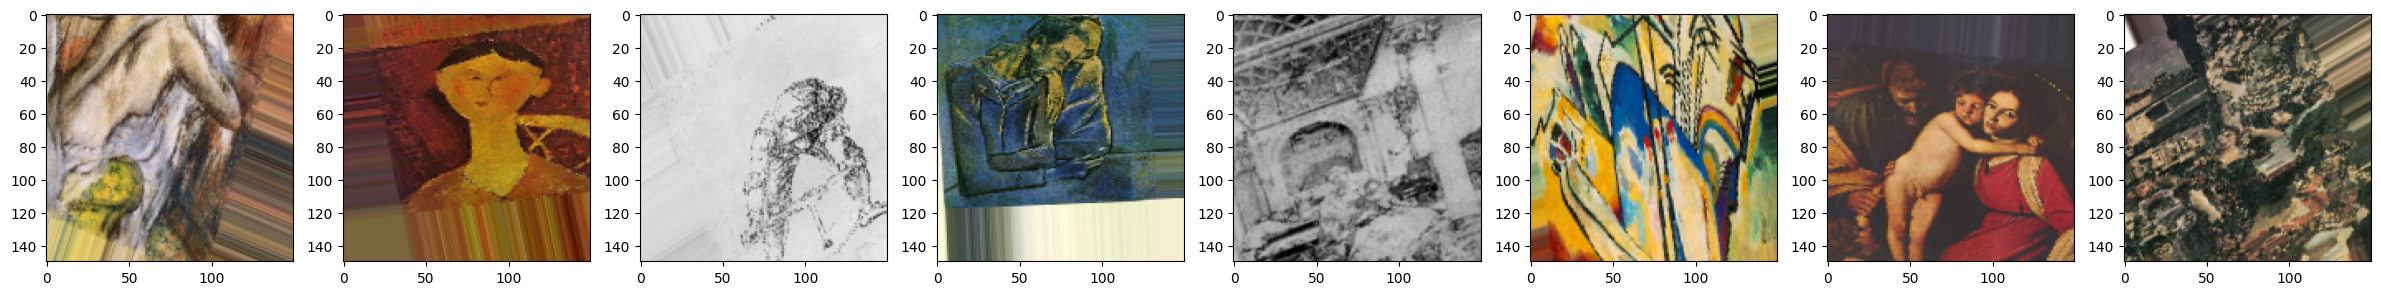

In [8]:
images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

# Modelo Base

In [9]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
						
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(51,activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 10)      280       
                                                                 
 flatten (Flatten)           (None, 219040)            0         
                                                                 
 dense (Dense)               (None, 256)               56074496  
                                                                 
 dense_1 (Dense)             (None, 51)                13107     
                                                                 
Total params: 56,087,883
Trainable params: 56,087,883
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
					train_generator, 
					epochs = 10)
				
			
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [ ]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'categorical')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)